**Fraud Detection Model**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,6634,-1.611463,0.190648,0.901715,1.531254,-1.535865,0.799245,1.513786,0.495829,0.200390,...,0.211223,0.007477,1.026272,0.057628,-0.024955,-0.368263,0.081684,0.140669,458.92,0.0
5970,6635,-1.420272,1.449354,1.320110,-1.894320,0.913695,0.454601,0.894179,-0.385450,2.433841,...,-0.529027,-0.368394,-0.247773,-1.189156,-0.126040,0.701487,0.277333,-0.222694,0.77,0.0
5971,6637,-1.206696,0.284728,2.152053,-2.850437,-0.437285,-0.238376,-0.333341,0.334679,2.870542,...,0.039460,0.464476,-0.457193,-0.556105,0.517579,0.008006,0.366054,0.185008,14.00,0.0
5972,6644,1.067611,0.091006,-0.153917,0.704233,0.113894,-0.826866,0.567690,-0.464181,0.957295,...,-0.476723,-1.410090,-0.037550,-0.177773,0.321810,0.114930,-0.109640,0.023205,139.90,0.0


**Data understanding and Preprocessing**

In [3]:
df.shape

(5974, 31)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

In [6]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
df.shape

(5973, 31)

In [9]:
df['Class'] = df['Class'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5973 entries, 0 to 5972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5973 non-null   int64  
 1   V1      5973 non-null   float64
 2   V2      5973 non-null   float64
 3   V3      5973 non-null   float64
 4   V4      5973 non-null   float64
 5   V5      5973 non-null   float64
 6   V6      5973 non-null   float64
 7   V7      5973 non-null   float64
 8   V8      5973 non-null   float64
 9   V9      5973 non-null   float64
 10  V10     5973 non-null   float64
 11  V11     5973 non-null   float64
 12  V12     5973 non-null   float64
 13  V13     5973 non-null   float64
 14  V14     5973 non-null   float64
 15  V15     5973 non-null   float64
 16  V16     5973 non-null   float64
 17  V17     5973 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  V22  

In [10]:
df['Class'].value_counts()

,count
Class,
0,5970
1,3


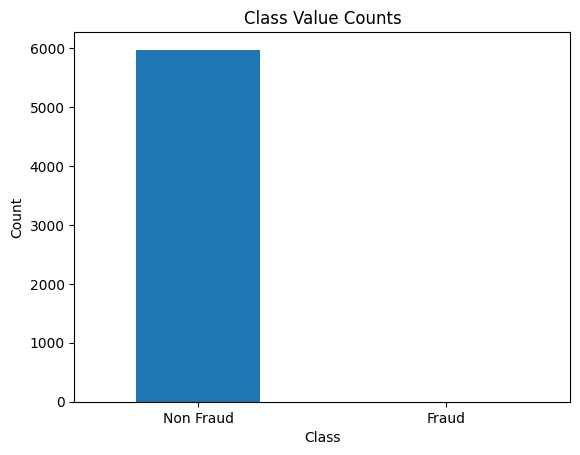

In [11]:
import matplotlib.pyplot as plt

df['Class'].value_counts().plot(kind='bar')
plt.title('Class Value Counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non Fraud', 'Fraud'],rotation=0)
plt.show()

**EDA**

In [12]:
# Convert Time to hours for easier visualization
df['Hour'] = df['Time'] / 3600

In [13]:
# Separate fraudulent and non-fraudulent transactions
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0]

In [14]:
# 1. Compare summary statistics of numerical features
print("Fraudulent transactions summary statistics:")
fraud_df.describe()

Fraudulent transactions summary statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000
mean,1780.000000,-2.553039,0.184644,-0.293711,2.872264,0.005330,-0.855718,-0.549831,0.308239,-1.093098,...,-0.177321,0.361160,-0.020311,0.056068,-0.170050,0.015979,-0.086847,256.310000,1.0,0.494444
std,2322.914549,0.424810,2.895819,1.350368,0.975056,1.182527,0.699235,1.725340,0.952783,1.452409,...,0.694944,0.934940,0.312439,0.218185,0.360868,0.257770,0.106296,264.880121,0.0,0.645254
min,406.000000,-3.043541,-3.157307,-1.609851,2.288644,-0.821628,-1.426545,-2.537387,-0.399147,-2.770089,...,-0.932391,-0.465211,-0.293803,-0.156114,-0.542628,-0.252773,-0.153029,0.000000,1.0,0.112778
25%,439.000000,-2.677884,-0.699030,-0.984798,2.309443,-0.671908,-1.245684,-1.105907,-0.233470,-1.520521,...,-0.483720,-0.146242,-0.190566,-0.055798,-0.343995,-0.106604,-0.148152,119.965000,1.0,0.121944
50%,472.000000,-2.312227,1.759247,-0.359745,2.330243,-0.522188,-1.064823,0.325574,-0.067794,-0.270953,...,-0.035049,0.172726,-0.087330,0.044519,-0.145362,0.039566,-0.143276,239.930000,1.0,0.131111
75%,2467.000000,-2.307788,1.855620,0.364359,3.164074,0.418809,-0.570305,0.443947,0.661932,-0.254603,...,0.200214,0.774346,0.116434,0.162159,0.016239,0.150355,-0.053756,384.465000,1.0,0.685278
max,4462.000000,-2.303350,1.951992,1.088463,3.997906,1.359805,-0.075788,0.562320,1.391657,-0.238253,...,0.435477,1.375966,0.320198,0.279798,0.177840,0.261145,0.035764,529.000000,1.0,1.239444


In [15]:
print("\nNon-fraudulent transactions summary statistics:")
non_fraud_df.describe()


Non-fraudulent transactions summary statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
count,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,...,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.0,5970.000000
mean,2677.402010,-0.264965,0.285625,0.844580,0.102656,0.000958,0.195420,0.018542,-0.039195,0.397472,...,-0.161540,-0.036683,0.028985,0.089890,-0.040132,0.025238,0.006163,64.965707,0.0,0.743723
std,1764.242849,1.394904,1.208096,1.031037,1.441327,1.185941,1.365712,1.059665,1.304302,1.047124,...,0.646417,0.372805,0.619938,0.407763,0.488353,0.364543,0.265182,192.429839,0.0,0.490067
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-12.968670,-23.632502,-3.336805,...,-8.454599,-7.996811,-2.512377,-2.322906,-1.338556,-7.976100,-2.909294,0.000000,0.0,0.000000
25%,1163.250000,-1.014956,-0.280054,0.296186,-0.840078,-0.608995,-0.677446,-0.492968,-0.189736,-0.263916,...,-0.594621,-0.187108,-0.350497,-0.152728,-0.399333,-0.049641,-0.017739,4.450000,0.0,0.323125
50%,2537.000000,-0.420160,0.346083,0.882882,0.160580,-0.083455,-0.142606,0.041590,0.037831,0.360892,...,-0.177211,-0.046782,0.095253,0.106364,-0.079417,0.015959,0.019421,15.620000,0.0,0.704722
75%,3779.750000,1.115778,0.941314,1.504158,1.070110,0.441406,0.605955,0.566461,0.343067,0.961662,...,0.273105,0.087916,0.436258,0.355221,0.246026,0.155245,0.082718,56.485000,0.0,1.049931
max,6644.000000,1.685314,7.467017,4.101716,6.013346,10.658654,21.393069,34.303177,3.877662,9.272376,...,4.393846,4.095021,3.200201,1.972515,3.463246,3.852046,4.860769,7712.430000,0.0,1.845556


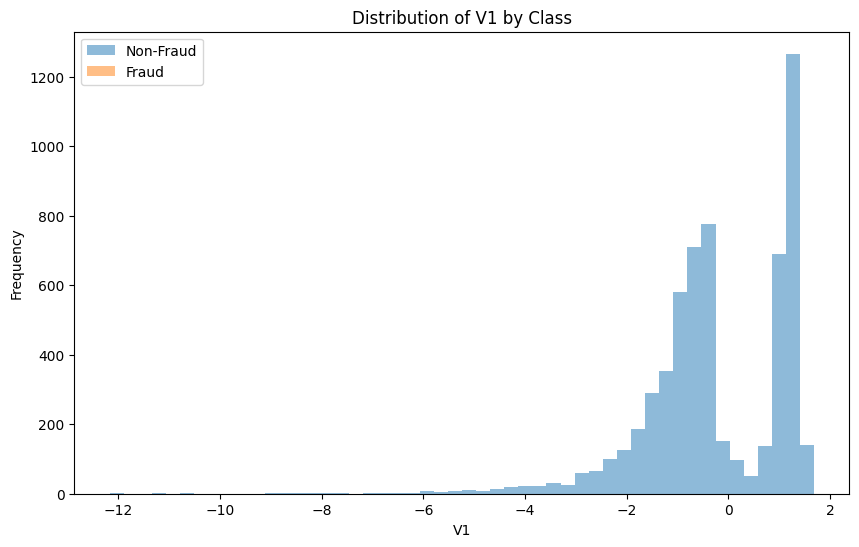

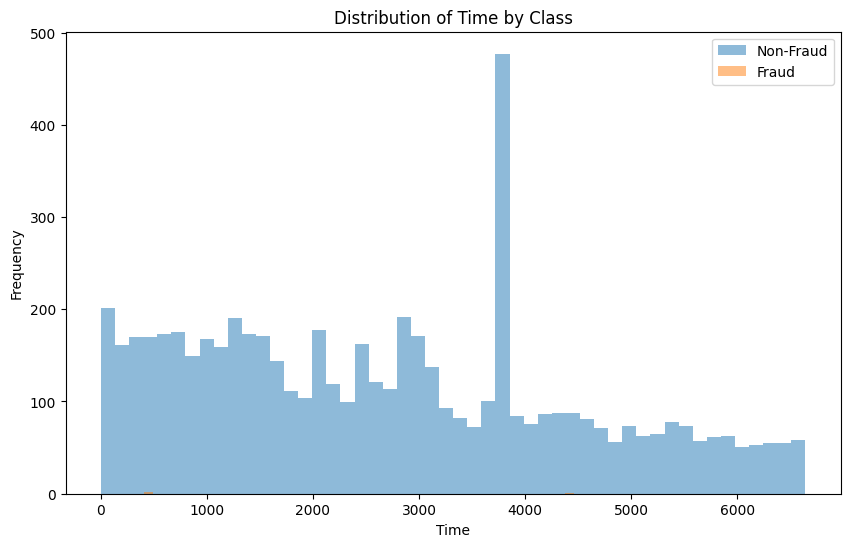

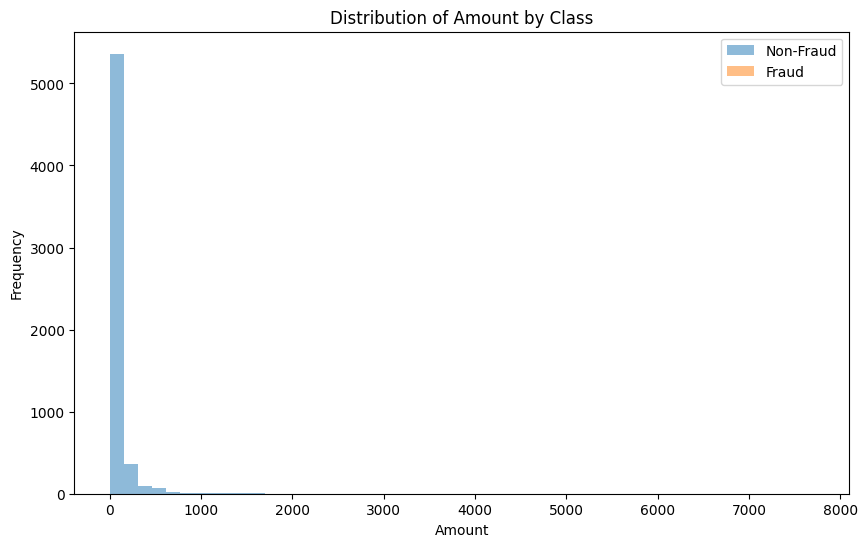

In [16]:
# 2. Visualize distributions of some features for both classes
features_to_compare = ['V1', 'Time', 'Amount']

for feature in features_to_compare:
  plt.figure(figsize=(10, 6))
  plt.hist(non_fraud_df[feature], bins=50, alpha=0.5, label='Non-Fraud')
  plt.hist(fraud_df[feature], bins=50, alpha=0.5, label='Fraud')
  plt.title(f'Distribution of {feature} by Class')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()

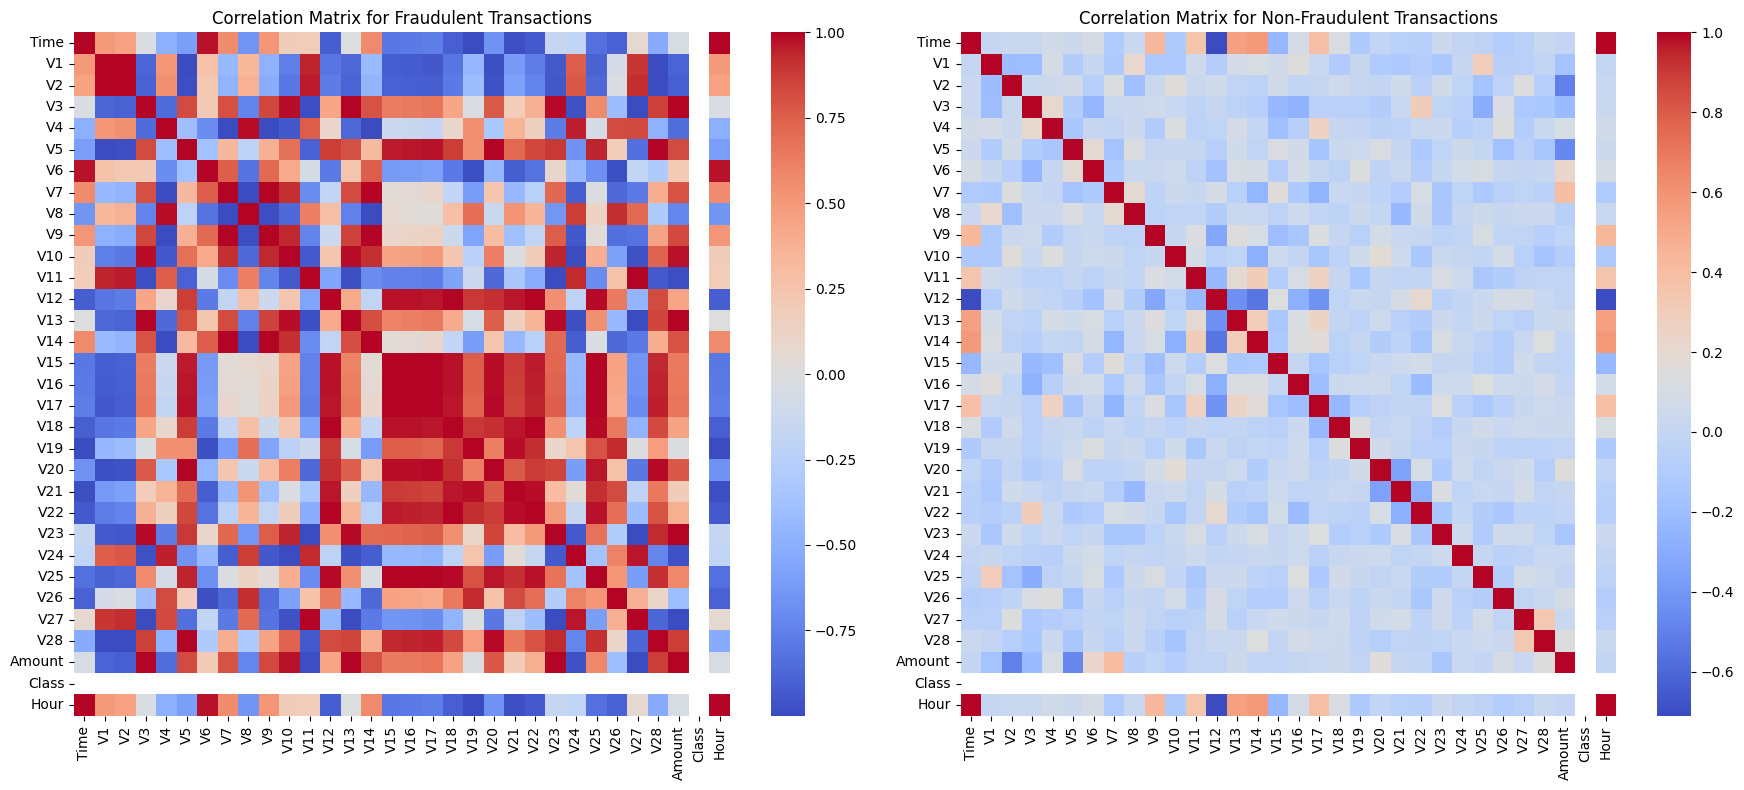

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrices
fraud_corr = fraud_df.corr()
non_fraud_corr = non_fraud_df.corr()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot heatmap for fraudulent transactions
sns.heatmap(fraud_corr, ax=axes[0], annot=False, cmap='coolwarm')
axes[0].set_title('Correlation Matrix for Fraudulent Transactions')

# Plot heatmap for non-fraudulent transactions
sns.heatmap(non_fraud_corr, ax=axes[1], annot=False, cmap='coolwarm')
axes[1].set_title('Correlation Matrix for Non-Fraudulent Transactions')

plt.tight_layout()
plt.show()

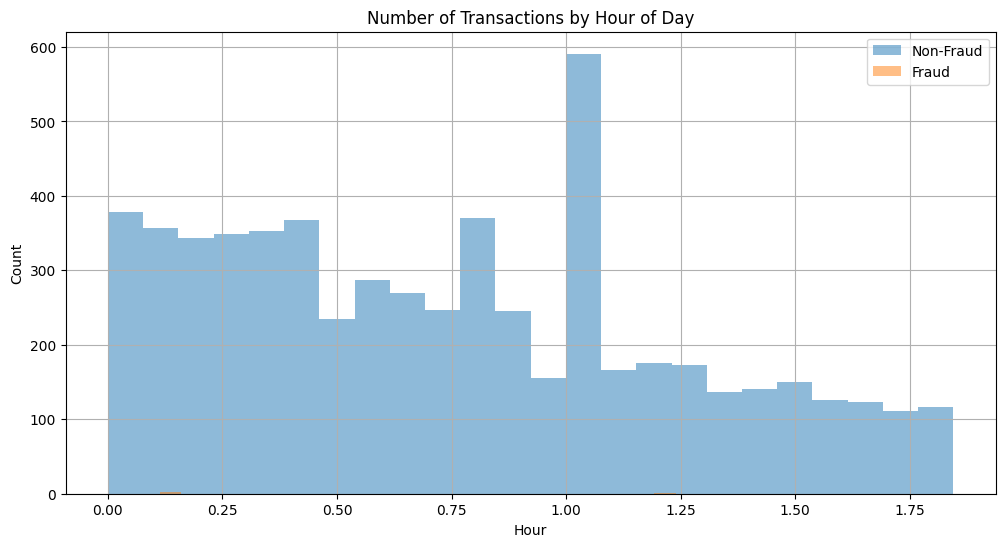

In [18]:
# 4. Consider time-based patterns

plt.figure(figsize=(12, 6))
non_fraud_df['Hour'].hist(bins=24, alpha=0.5, label='Non-Fraud')
fraud_df['Hour'].hist(bins=24, alpha=0.5, label='Fraud')
plt.title('Number of Transactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()
plt.show()

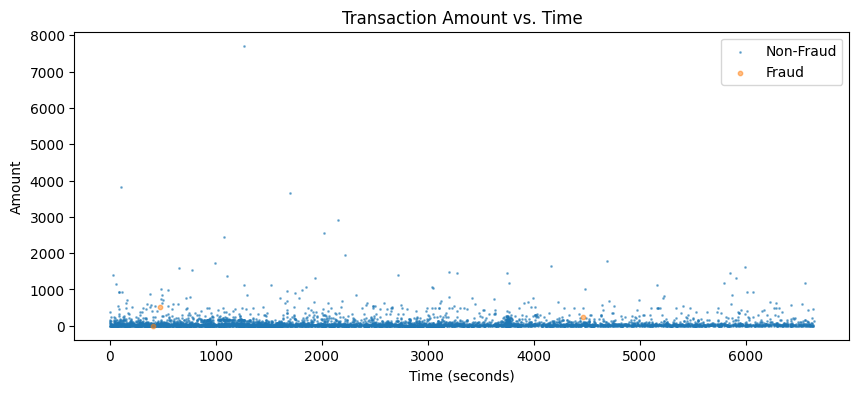

In [19]:
# Scatter plot of Time vs. Amount
plt.figure(figsize=(10, 4))
plt.scatter(non_fraud_df['Time'], non_fraud_df['Amount'], alpha=0.5, label='Non-Fraud', s=1)
plt.scatter(fraud_df['Time'], fraud_df['Amount'], alpha=0.5, label='Fraud', s=10) # Use a larger size for fraud points
plt.title('Transaction Amount vs. Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Amount')
plt.legend()
plt.show()


**Feature Engineering**

In [20]:
# Time-based features
df['Hour'] = np.floor(df['Time'] / 3600) % 24
df['TimeBin'] = pd.cut(df['Hour'], bins=[-1, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
df['IsNight'] = df['Hour'].apply(lambda x: 1 if x < 6 or x >= 22 else 0)
df['DeltaTimePrev'] = df['Time'].diff().fillna(0)

In [21]:
# Amount-based features
df['LogAmount'] = np.log1p(df['Amount'])
df['HighAmountFlag'] = df['Amount'] > df['Amount'].quantile(0.99)
df['AmountBin'] = pd.cut(df['Amount'], bins=[-1, 10, 100, 1000, df['Amount'].max()], labels=['Low', 'Medium', 'High', 'Very High'])
df['ZScoreAmount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

In [22]:
# Behavior-based features (rolling features)
df['TxnCountPastHour'] = df['Time'].rolling(window=100, min_periods=1).apply(lambda x: sum(np.diff(x) <= 3600))
df['CumulativeTxnAmount'] = df['Amount'].cumsum()

In [23]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Hour,TimeBin,IsNight,DeltaTimePrev,LogAmount,HighAmountFlag,AmountBin,ZScoreAmount,TxnCountPastHour,CumulativeTxnAmount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.0,Night,1,0.0,5.014760,False,High,0.439285,0.0,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.0,Night,1,0.0,1.305626,False,Low,-0.324026,1.0,152.31
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.0,Night,1,1.0,5.939276,False,High,1.629163,2.0,530.97
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.0,Night,1,0.0,4.824306,False,High,0.303590,3.0,654.47
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.0,Night,1,1.0,4.262539,False,Medium,0.025602,4.0,724.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,6633,1.197756,0.553352,0.866976,1.432084,-0.454121,-1.127419,0.115799,-0.375933,1.110818,...,1.0,Night,1,6.0,1.791759,False,Low,-0.312025,99.0,388000.61
5969,6634,-1.611463,0.190648,0.901715,1.531254,-1.535865,0.799245,1.513786,0.495829,0.200390,...,1.0,Night,1,1.0,6.131053,False,High,2.046120,99.0,388459.53
5970,6635,-1.420272,1.449354,1.320110,-1.894320,0.913695,0.454601,0.894179,-0.385450,2.433841,...,1.0,Night,1,1.0,0.570980,False,Low,-0.334000,99.0,388460.30
5971,6637,-1.206696,0.284728,2.152053,-2.850437,-0.437285,-0.238376,-0.333341,0.334679,2.870542,...,1.0,Night,1,2.0,2.708050,False,Medium,-0.265270,99.0,388474.30


**Data Transformation**

In [24]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = ['TimeBin', 'AmountBin']

# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in categorical_cols:
  label_encoders[col] = LabelEncoder()
  df[col] = label_encoders[col].fit_transform(df[col])

In [25]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Hour,TimeBin,IsNight,DeltaTimePrev,LogAmount,HighAmountFlag,AmountBin,ZScoreAmount,TxnCountPastHour,CumulativeTxnAmount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.0,0,1,0.0,5.014760,False,0,0.439285,0.0,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.0,0,1,0.0,1.305626,False,1,-0.324026,1.0,152.31
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.0,0,1,1.0,5.939276,False,0,1.629163,2.0,530.97
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.0,0,1,0.0,4.824306,False,0,0.303590,3.0,654.47
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.0,0,1,1.0,4.262539,False,2,0.025602,4.0,724.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,6633,1.197756,0.553352,0.866976,1.432084,-0.454121,-1.127419,0.115799,-0.375933,1.110818,...,1.0,0,1,6.0,1.791759,False,1,-0.312025,99.0,388000.61
5969,6634,-1.611463,0.190648,0.901715,1.531254,-1.535865,0.799245,1.513786,0.495829,0.200390,...,1.0,0,1,1.0,6.131053,False,0,2.046120,99.0,388459.53
5970,6635,-1.420272,1.449354,1.320110,-1.894320,0.913695,0.454601,0.894179,-0.385450,2.433841,...,1.0,0,1,1.0,0.570980,False,1,-0.334000,99.0,388460.30
5971,6637,-1.206696,0.284728,2.152053,-2.850437,-0.437285,-0.238376,-0.333341,0.334679,2.870542,...,1.0,0,1,2.0,2.708050,False,2,-0.265270,99.0,388474.30


In [26]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Exclude the target variable if it's included in numerical_cols
if 'Class' in numerical_cols:
    numerical_cols.remove('Class')

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the selected numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Hour,TimeBin,IsNight,DeltaTimePrev,LogAmount,HighAmountFlag,AmountBin,ZScoreAmount,TxnCountPastHour,CumulativeTxnAmount
0,-1.517306,-0.783784,-0.296442,1.640971,0.883392,-0.286134,0.195893,0.208841,0.105612,-0.031439,...,-0.712174,0.0,0.0,-0.748657,1.326496,False,-1.817446,0.439322,-13.324231,-1.803055
1,-1.517306,1.044840,-0.016068,-0.656962,0.238584,0.049806,-0.203038,-0.091578,0.095185,-0.622491,...,-0.712174,0.0,0.0,-0.748657,-0.996173,False,-0.427662,-0.324053,-13.188507,-1.803030
2,-1.516740,-0.782743,-1.344858,0.900997,0.191177,-0.425184,1.175823,0.729536,0.219858,-1.824455,...,-0.712174,0.0,0.0,-0.075609,1.905431,False,-1.817446,1.629300,-13.052782,-1.799553
3,-1.516740,-0.501761,-0.389460,0.920181,-0.670696,-0.009504,0.770632,0.206964,0.319367,-1.702629,...,-0.712174,0.0,0.0,-0.748657,1.207233,False,-1.817446,0.303616,-12.917058,-1.798418
4,-1.516173,-0.639328,0.489854,0.683320,0.207300,-0.344218,-0.072478,0.542228,-0.177540,0.401869,...,-0.712174,0.0,0.0,-0.075609,0.855453,False,0.962123,0.025604,-12.781334,-1.797776


In [27]:
# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

**SMOTE for unbalanced data**

In [29]:
from imblearn.over_sampling import SMOTE

# Check the distribution of the target variable before applying SMOTE
print("Class value counts before SMOTE:")
print(y.value_counts())

# If the smallest class count is less than the default k_neighbors (which is 5),
# set k_neighbors to that count - 1.
min_class_count = y.value_counts().min()
if min_class_count < 5:
    smote = SMOTE(random_state=42, k_neighbors=max(1, min_class_count - 1)) # Ensure k_neighbors is at least 1
else:
    smote = SMOTE(random_state=42) # Use default if minority class is large enough

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

Class value counts before SMOTE:
Class
0    5970
1       3
Name: count, dtype: int64


In [30]:
# Print the new class distribution
print("\nClass value counts after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class value counts after SMOTE:
Class
0    5970
1    5970
Name: count, dtype: int64


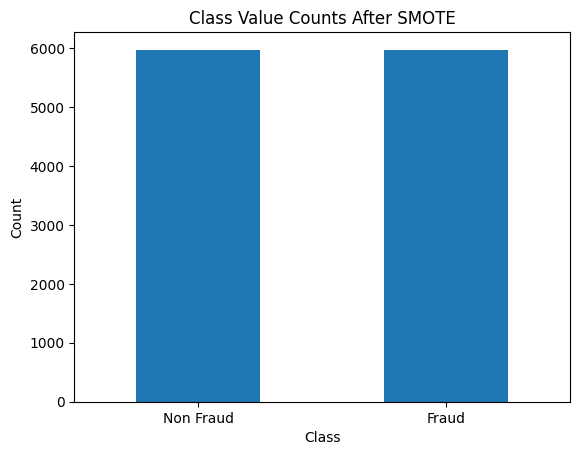

In [31]:
# Visualize the new class distribution
pd.Series(y_resampled).value_counts().plot(kind='bar')
plt.title('Class Value Counts After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non Fraud', 'Fraud'],rotation=0)
plt.show()

**Model Building and Evaluation**

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**Logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [34]:
log_pred = logreg.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, log_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [36]:
log_classification_report = classification_report(y_test, log_pred)
print("Classification Report:")
print(log_classification_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1222
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2388
   macro avg       1.00      1.00      1.00      2388
weighted avg       1.00      1.00      1.00      2388



In [37]:
confusion_mat = confusion_matrix(y_test, log_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[1218    4]
 [   0 1166]]


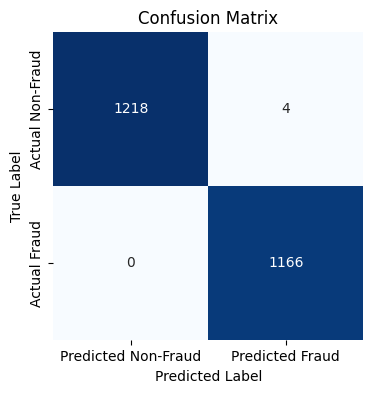

In [38]:
# Visualize the Confusion Matrix as a Heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Decision Tree**

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
dt_pred=dt.predict(X_test)

In [41]:
dt_classification_report = classification_report(y_test,dt_pred)
print("Classification Report (Decision Tree):")
print(dt_classification_report)

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1222
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2388
   macro avg       1.00      1.00      1.00      2388
weighted avg       1.00      1.00      1.00      2388



In [50]:
dt_confusion_mat = confusion_matrix(y_test, dt_pred)
print("Confusion Matrix:")
print(dt_confusion_mat)

Confusion Matrix:
[[1220    2]
 [   0 1166]]


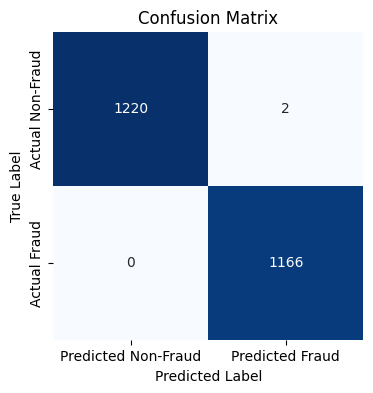

In [43]:
# Visualize the Confusion Matrix as a Heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(dt_confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**XGBoost**

In [ ]:
!pip install xgboost


In [44]:
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
xgb_pred=xgb.predict(X_test)

In [46]:
xgb_classification_report = classification_report(y_test,xgb_pred)
print("Classification Report (XGBoost):")
print(xgb_classification_report)

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1222
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2388
   macro avg       1.00      1.00      1.00      2388
weighted avg       1.00      1.00      1.00      2388



In [49]:
xgb_confusion_mat = confusion_matrix(y_test, xgb_pred)
print("Confusion Matrix:")
print(xgb_confusion_mat)

Confusion Matrix:
[[1221    1]
 [   0 1166]]


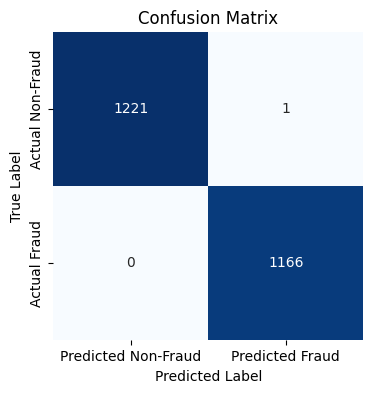

In [48]:
# Visualize the Confusion Matrix as a Heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(xgb_confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Models comparison**

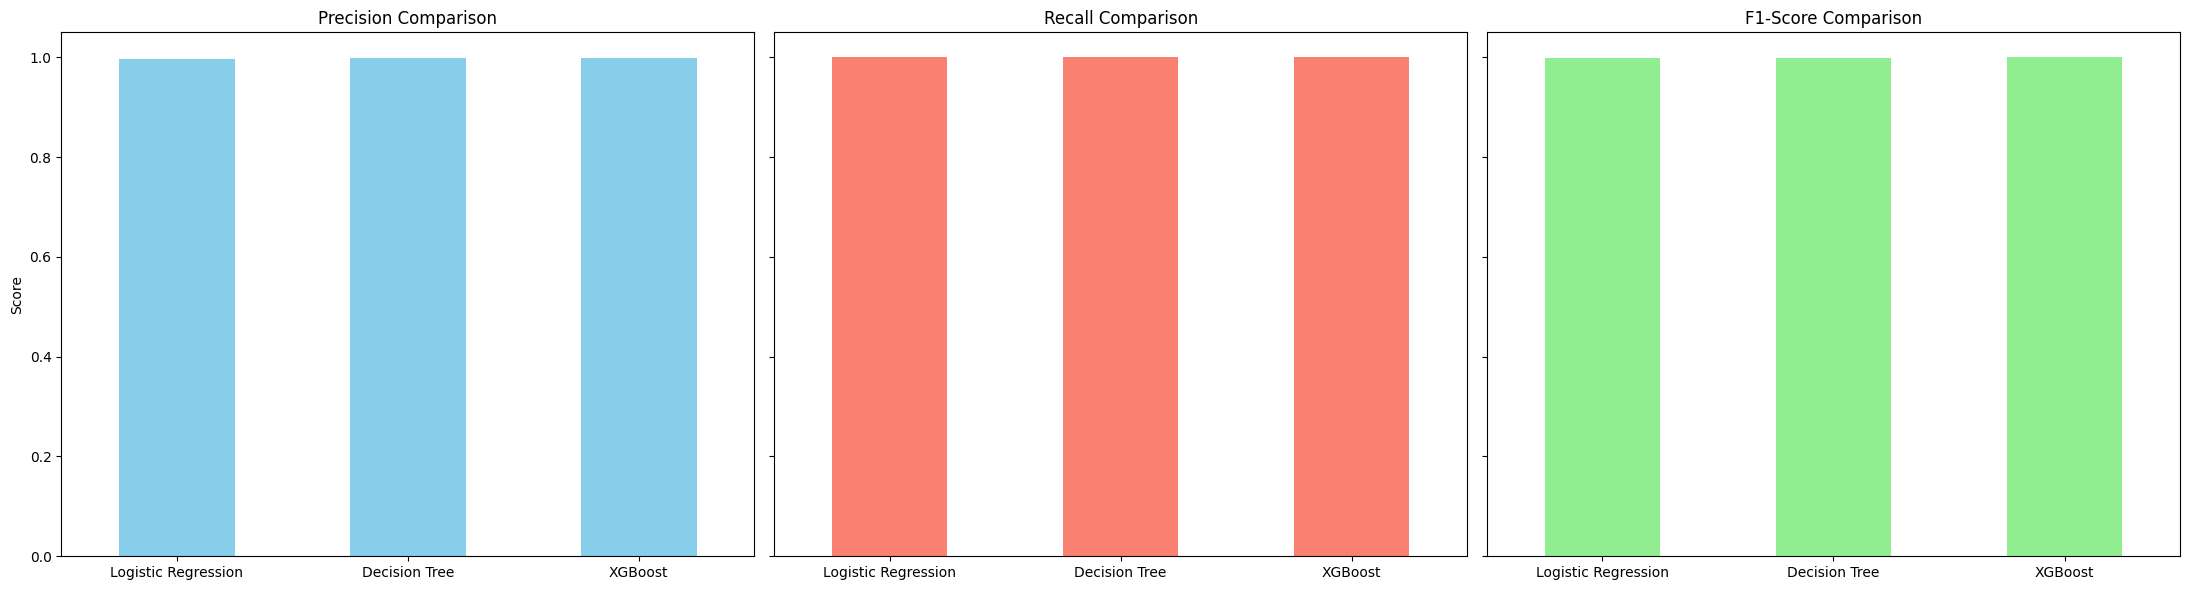

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate evaluation metrics for each model
log_precision = precision_score(y_test, log_pred)
log_recall = recall_score(y_test, log_pred)
log_f1 = f1_score(y_test, log_pred)

dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

# Create a dictionary of metrics
metrics = {
    'Logistic Regression': {'Precision': log_precision, 'Recall': log_recall, 'F1-Score': log_f1},
    'Decision Tree': {'Precision': dt_precision, 'Recall': dt_recall, 'F1-Score': dt_f1},
    'XGBoost': {'Precision': xgb_precision, 'Recall': xgb_recall, 'F1-Score': xgb_f1}
}

# Convert the dictionary to a DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics).T

# Plotting the metrics
fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=True)

metrics_df['Precision'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Precision Comparison')
axes[0].set_ylabel('Score')
axes[0].tick_params(axis='x', rotation=0)

metrics_df['Recall'].plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Recall Comparison')
axes[1].tick_params(axis='x', rotation=0)

metrics_df['F1-Score'].plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('F1-Score Comparison')
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

**Feature Importance**

In [52]:
importance = xgb.feature_importances_

In [53]:
# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [54]:
print("\nFeature Importance (XGBoost):")
print(feature_importance_df)


Feature Importance (XGBoost):
                Feature  Importance
14                  V14    0.905872
4                    V4    0.063685
1                    V1    0.010078
36            AmountBin    0.007292
6                    V6    0.004642
26                  V26    0.003471
10                  V10    0.003181
22                  V22    0.001211
21                  V21    0.000259
17                  V17    0.000159
9                    V9    0.000100
12                  V12    0.000040
25                  V25    0.000009
0                  Time    0.000000
2                    V2    0.000000
3                    V3    0.000000
7                    V7    0.000000
5                    V5    0.000000
15                  V15    0.000000
16                  V16    0.000000
19                  V19    0.000000
13                  V13    0.000000
8                    V8    0.000000
11                  V11    0.000000
23                  V23    0.000000
20                  V20    0.0000

/tmp/ipython-input-55-1038645238.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(12), palette='viridis') # Adjust head() to show more/fewer features


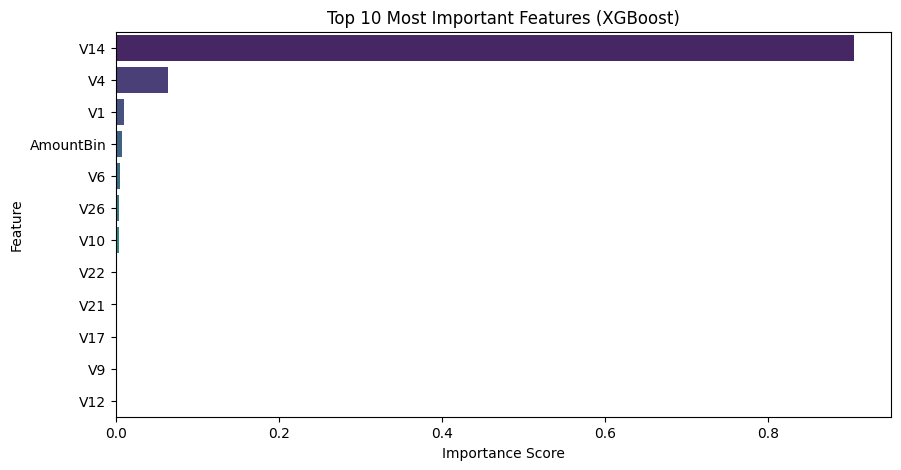

In [55]:
# Visualize the top N most important features
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(12), palette='viridis') # Adjust head() to show more/fewer features
plt.title('Top 10 Most Important Features (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [56]:
# Get the top 13 feature names from the feature importance DataFrame
top_13_features = feature_importance_df['Feature'].head(13).tolist()

# Create a new DataFrame with only the top 11 features and the target variable
df_top_13 = df[top_13_features + ['Class']]

In [57]:
df_top_13

,V14,V4,V1,AmountBin,V6,V26,V10,V22,V21,V17,V9,V12,V25,Class
0,-0.686477,0.883392,-0.783784,-1.817446,0.195893,-0.305008,0.202066,0.679820,0.028068,0.039867,-0.031439,-0.005537,0.094853,0
1,-0.519785,0.238584,1.044840,-0.427662,-0.203038,0.340182,-0.058972,-0.738211,-0.206823,-0.362632,-0.622491,1.166753,0.189620,0
2,-0.541865,0.191177,-0.782743,-1.817446,1.175823,-0.202562,0.320397,1.443896,0.329572,1.164652,-1.824455,0.470811,-1.024208,0
3,-0.663329,-0.670696,-0.501761,-1.817446,0.770632,-0.372216,0.054471,0.258107,-0.073820,-1.072531,-1.702629,0.548924,1.367615,0
4,-1.491570,0.207300,-0.639328,0.962123,-0.072478,1.111104,0.872746,1.485051,0.038117,-0.515051,0.401869,0.799653,-0.725831,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,1.161388,0.920783,1.049068,-0.427662,-0.968358,-0.971170,-0.307213,0.077547,-0.125851,0.252053,0.681620,-0.572042,0.982515,0
5969,2.128272,0.989542,-0.964131,-1.817446,0.442581,-0.671931,-0.714077,0.261517,0.287936,0.921556,-0.187405,-1.249869,-0.281684,0
5970,0.129579,-1.385551,-0.827116,-0.427662,0.190191,1.519086,1.318715,-0.320035,-0.550156,-1.102345,1.944476,-1.138059,-0.529657,0
5971,1.105812,-2.048466,-0.674059,0.962123,-0.317292,0.098726,-1.507866,0.968588,0.093470,-0.855439,2.361317,-1.441802,1.049211,0


In [61]:
# Separate features (X) and target (y) for the new DataFrame
X_top_13 = df_top_13.drop('Class', axis=1)
y_top_13 = df_top_13['Class']

In [67]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the data with top 11 features

# Check the distribution of the target variable in the subset dataframe
min_class_count_top_13 = y_top_13.value_counts().min()

# If the smallest class count is less than the default k_neighbors (which is 5),
# set k_neighbors to that count - 1.
# Ensure k_neighbors is at least 1.
if min_class_count_top_13 < 5:
    smote_top_13 = SMOTE(random_state=42, k_neighbors=max(1, min_class_count_top_13 - 1))
else:
    smote_top_13 = SMOTE(random_state=42) # Use default if minority class is large enough


X_resampled_top_13, y_resampled_top_13 = smote_top_13.fit_resample(X_top_13, y_top_13)

In [68]:
# Split the resampled data into training and testing sets
X_train_top_13, X_test_top_13, y_train_top_13, y_test_top_13 = train_test_split(
    X_resampled_top_13, y_resampled_top_13, test_size=0.2, random_state=42)

**XGBoost model with top 13 Important features**

In [69]:
# Initialize and train the XGBoost model
import xgboost as xgb
xgb_top_13 = xgb.XGBClassifier()
xgb_top_13.fit(X_train_top_13, y_train_top_13)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
# Make predictions
xgb_pred_top_13 = xgb_top_13.predict(X_test_top_13)

In [71]:
# Evaluate the model
xgb_classification_report_top_13 = classification_report(y_test_top_13, xgb_pred_top_13)
print("Classification Report (XGBoost with Top 13 Features):")
print(xgb_classification_report_top_13)

Classification Report (XGBoost with Top 13 Features):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1222
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2388
   macro avg       1.00      1.00      1.00      2388
weighted avg       1.00      1.00      1.00      2388



In [73]:
xgb_confusion_mat_top_13 = confusion_matrix(y_test_top_13, xgb_pred_top_13)
print("Confusion Matrix (XGBoost with Top 13 Features):")
print(xgb_confusion_mat_top_13)

Confusion Matrix (XGBoost with Top 13 Features):
[[1221    1]
 [   0 1166]]


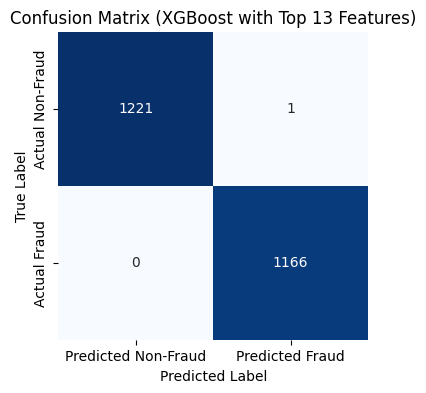

In [74]:
# Visualize the Confusion Matrix as a Heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(xgb_confusion_mat_top_13, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (XGBoost with Top 13 Features)')
plt.show()

In [76]:
from sklearn.metrics import roc_curve, auc
# Get probability predictions for the positive class
y_pred_proba_top_13 = xgb_top_13.predict_proba(X_test_top_13)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_top_13, y_pred_proba_top_13)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

In [77]:
print(f"AUC for XGBoost with Top 13 Features: {roc_auc:.4f}")

AUC for XGBoost with Top 13 Features: 1.0000


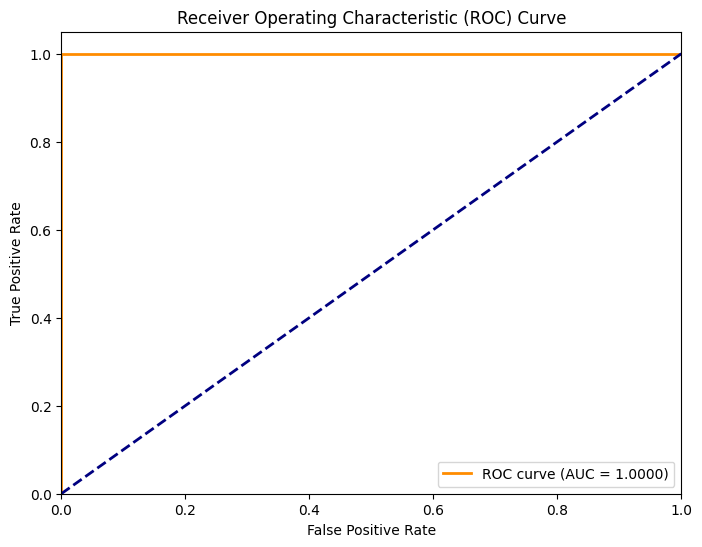

In [78]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [79]:

import pickle

# Save the xgb_top_13 model to a pkl file
with open('xgb_top_13.pkl', 'wb') as f:
  pickle.dump(xgb_top_13, f)

print("xgb_top_13 model saved as xgb_top_13.pkl")

xgb_top_13 model saved as xgb_top_13.pkl


In [80]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.3 MB/s eta 0:00:00


In [81]:
!wget -q -O - ipv4.icanhazip.com

35.245.225.39


In [86]:
! streamlit run fraud.py & npx localtunnel --port 8501



⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.225.39:8501

⠸⠼⠴your url is: https://sixty-points-read.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
  Stopping...
^C
